In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import plotly.express as px

# Reading Data

In [183]:
fe = []
with open("train.txt", "r") as f:
    for raw_line in f:
        line = raw_line.strip().split("\t")
        fe.append(len(line))

In [189]:
def create_df(filename="train.txt"):
    data = {'Source':[], 'Sink':[]}
    with open(filename, "r") as f:
        for raw_line in f:
            line = raw_line.strip().split("\t")
            data['Source'] += [line[0]]*(len(line)-1)
            data['Sink'] += line[1:]
    pd_data = pd.DataFrame(data=data)
#     pd_data[['Source', 'Sink']] = pd_data[['Source', 'Sink']].apply(pd.to_numeric)
    pd_data = pd_data.drop_duplicates(keep=False)
    return pd_data

In [303]:
def read_sub():
    with open('test-public.txt', 'r') as f:
        # skip the header
        f.readline()
        data = {'Source':[], 'Sink':[]}
        for raw_line in f:
            line = raw_line.strip().split("\t")
            data['Source'].append(int(line[1]))
            data['Sink'].append(int(line[2]))
        return pd.DataFrame(data=data)

In [192]:
data = pd.read_csv("processed_train_f_reduced.csv")

In [195]:
data.head()

,Source,Sink
0,4762204,4058810
1,4762204,757117
2,4762204,1165800
3,4762204,479394
4,4762204,3446558


In [194]:
data.shape

(323932, 2)

In [17]:
data.to_csv("processed_train.csv", header=False, index=False)

In [304]:
sub_data = read_sub()

In [305]:
sub_data.head()

,Source,Sink
0,3563811,3600160
1,2052043,1401960
2,4517994,1690636
3,1660006,4349447
4,581111,1882617


In [307]:
sub_data.shape

(2000, 2)

In [29]:
sub_nodes = set(sub_data['Source'].value_counts().keys()).union(sub_data['Sink'].value_counts().keys())

In [32]:
reduced_df = data[(data['Source'].isin(sub_nodes)) | (data['Sink'].isin(sub_nodes))]

In [33]:
reduced_df.shape

(5037682, 2)

In [35]:
data = reduced_df

In [36]:
data.to_csv("processed_train_reduced.csv", header=False, index=False)

# Data Analysis

### Visualising using networkx

In [198]:
# g = nx.read_edgelist('processed_train.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
g = nx.from_pandas_edgelist(data, "Source", "Sink", create_using=nx.DiGraph())

In [199]:
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 135143
Number of edges: 323932
Average in degree:   2.3970
Average out degree:   2.3970


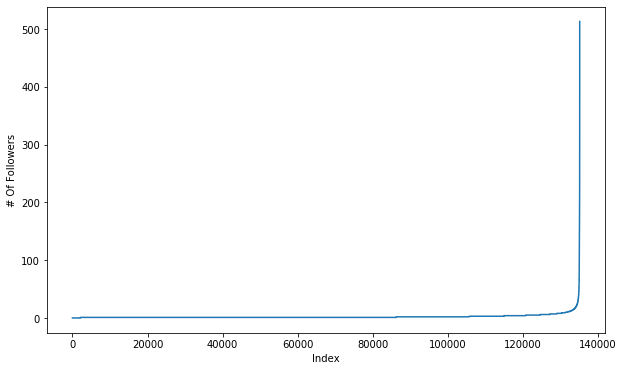

In [200]:
indegree_dist = list(dict(g.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(indegree_dist)
plt.xlabel('Index')
plt.ylabel('# Of Followers')
plt.show()

In [201]:
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(indegree_dist, 90+i))

90 percentile value is 5.0
91 percentile value is 5.0
92 percentile value is 5.0
93 percentile value is 6.0
94 percentile value is 6.0
95 percentile value is 7.0
96 percentile value is 8.0
97 percentile value is 9.0
98 percentile value is 11.0
99 percentile value is 17.0
100 percentile value is 513.0


In [202]:
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(indegree_dist,99+(i/100)))

99.1 percentile value is 17.0
99.2 percentile value is 19.0
99.3 percentile value is 20.0
99.4 percentile value is 22.0
99.5 percentile value is 24.0
99.6 percentile value is 27.4320000000007
99.7 percentile value is 32.0
99.8 percentile value is 41.0
99.9 percentile value is 70.0
100.0 percentile value is 513.0


In [203]:
print('# of persons who have no followers' ,sum(np.array(indegree_dist)==0),'and % is',
        sum(np.array(indegree_dist)==0)*100/len(indegree_dist))

# of persons who have no followers 2126 and % is 1.5731484427606313


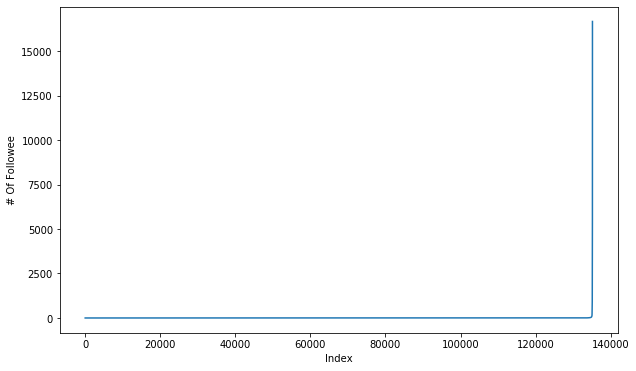

In [204]:
outdegree_dist = list(dict(g.out_degree()).values())
outdegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(outdegree_dist)
plt.xlabel('Index')
plt.ylabel('# Of Followee')
plt.show()

In [205]:
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(outdegree_dist, 99+(i/100)))

99.1 percentile value is 9.0
99.2 percentile value is 10.0
99.3 percentile value is 12.0
99.4 percentile value is 16.0
99.5 percentile value is 19.29000000000815
99.6 percentile value is 25.0
99.7 percentile value is 35.0
99.8 percentile value is 53.0
99.9 percentile value is 130.57400000002235
100.0 percentile value is 16663.0


In [206]:
for i in range(900,1010,10):
    print(99+(i/1000),'percentile value is',np.percentile(outdegree_dist, 99+(i/1000)))

99.9 percentile value is 130.57400000002235
99.91 percentile value is 150.11660000003758
99.92 percentile value is 192.772799999977
99.93 percentile value is 283.0
99.94 percentile value is 367.7847999999649
99.95 percentile value is 450.1450000000186
99.96 percentile value is 992.9103999985382
99.97 percentile value is 1957.8700000006938
99.98 percentile value is 2699.630799999868
99.99 percentile value is 5250.934399997117
100.0 percentile value is 16663.0


In [207]:
print('# of persons those are not following anyone are', sum(np.array(outdegree_dist)==0),'and % is',
        sum(np.array(outdegree_dist)==0)*100/len(outdegree_dist))

# of persons those are not following anyone are 132537 and % is 98.07167222867629


# Negative Data preparing and Train-validation split

In [208]:
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 135143
Number of edges: 323932
Average in degree:   2.3970
Average out degree:   2.3970


### generate random missing edge

In [209]:
import random
import csv
# getting the processed connection
raw_connection = csv.reader(open('processed_train.csv', 'r'))

exist_edges = {}

for edge in raw_connection:
    exist_edges[(edge[0], edge[1])] = 1

# in order to prevent overfitting, we generate the same number of negative edge
missing_edges = set()
while(len(missing_edges) < 323932):
    a = random.randint(1, 135143)
    b = random.randint(1, 135143)
    if a == b:
        continue
        
    existance = exist_edges.get((a,b), -1)
    if existance == -1:
        try:
            # if distance within 2, that means they share a common follower and very likely to be friends in real world or at least know each others
            if nx.shortest_path_length(g, source=a, target=b) > 2:
                missing_edges.add((a,b))
            else:
                continue
        except:
            missing_edges.add((a,b))

In [210]:
len(missing_edges)

323932

In [211]:
import pickle
pickle.dump(missing_edges, open('data/missing_edges_final.p', 'wb'))

### Train-Test Partition

In [212]:
negative_data = pd.DataFrame(list(missing_edges), columns=['Source', 'Sink'])

In [213]:
len(data)

323932

In [214]:
len(negative_data)

323932

In [215]:
from sklearn.model_selection import train_test_split
#Trian test split 
#positive links and negative links seperatly because we need positive training data only for creating graph and for feature generation
X_train_pos, X_test_pos, y_train_pos, y_test_pos  = train_test_split(data, np.ones(len(data)), test_size=0.2, random_state=90051)
X_train_neg, X_test_neg, y_train_neg, y_test_neg  = train_test_split(negative_data, np.zeros(len(negative_data)), test_size=0.2, random_state=90051)

In [216]:
# !TODO the data is not perfectly balanced, maybe fixed this later
print('='*60)
print("Number of nodes in the train data graph with edges", y_train_pos.shape[0])
print("Number of nodes in the train data graph without edges", y_train_neg.shape[0])
print('='*60)
print("Number of nodes in the test data graph with edges", y_test_pos.shape[0])
print("Number of nodes in the test data graph without edges", y_test_neg.shape[0])

Number of nodes in the train data graph with edges 259145
Number of nodes in the train data graph without edges 259145
Number of nodes in the test data graph with edges 64787
Number of nodes in the test data graph without edges 64787


In [217]:
#removing header and saving
X_train_pos.to_csv('data/train_pos.csv',header=False, index=False)
X_test_pos.to_csv('data/test_pos.csv',header=False, index=False)
X_train_neg.to_csv('data/train_neg.csv',header=False, index=False)
X_test_neg.to_csv('data/test_neg.csv',header=False, index=False)

In [218]:
X_train = X_train_pos.append(X_train_neg, ignore_index=True)
y_train = np.concatenate((y_train_pos, y_train_neg))
X_test = X_test_pos.append(X_test_neg, ignore_index=True)
y_test = np.concatenate((y_test_pos, y_test_neg))

# Feature Engineering

In [219]:
#generate train and test graph
train_graph = nx.read_edgelist('data/train_pos.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
print(nx.info(train_graph))

Name: 
Type: DiGraph
Number of nodes: 117429
Number of edges: 259145
Average in degree:   2.2068
Average out degree:   2.2068


In [220]:
def jaccard_followees(a, b, train_graph=train_graph):
    try:
        if len(set(train_graph.successors(a))) == 0 or len(set(train_graph.successors(b))) == 0:
            return 0
        else:
            intersection = len(set(train_graph.successors(a)).intersection(set(train_graph.successors(b))))
            union = len(set(train_graph.successors(a)).union(set(train_graph.successors(b))))
            return intersection/union
    except:
        return 0
    return sim

def jaccard_followers(a,b, train_graph=train_graph):
    try:
        if set(train_graph.predecessors(a)) == 0 or len(set(g.predecessors(b))) == 0:
            return 0
        else:
            intersection = len(set(train_graph.predecessors(a)).intersection(set(train_graph.predecessors(b))))
            union = len(set(train_graph.predecessors(a)).union(set(train_graph.predecessors(b))))
            return intersection/union
    except:
        return 0

In [221]:
#for followees
def cosine_followees(a, b, train_graph=train_graph):
    try:
        if len(set(train_graph.successors(a))) == 0 or len(set(train_graph.successors(b))) == 0:
            return 0
        else:
            return (len(set(train_graph.successors(a)).intersection(set(train_graph.successors(b)))))/\
                                    (math.sqrt(len(set(train_graph.successors(a)))*len((set(train_graph.successors(b))))))
    except:
        return 0
    
def cosine_followers(a, b, train_graph=train_graph):
    try:
        
        if len(set(train_graph.predecessors(a))) == 0 or len(set(train_graph.predecessors(b))) == 0:
            return 0
        else:
            return (len(set(train_graph.predecessors(a)).intersection(set(train_graph.predecessors(b)))))/\
                                     (math.sqrt(len(set(train_graph.predecessors(a))))*(len(set(train_graph.predecessors(b)))))
    except:
        return 0

In [311]:
# caclulating the page rank for each node pair
pr = nx.pagerank(train_graph, alpha=0.85)
pickle.dump(pr,open('data/page_rank.p','wb'))
# use the mean for all the data points which are part of the test dataset but are not in the training dataset
mean_pr = float(sum(pr.values())) / len(pr)

print('min',pr[min(pr, key=pr.get)])
print('max',pr[max(pr, key=pr.get)])
print('mean', mean_pr)

min 8.362051873775734e-06
max 0.00048134944932700383
mean 8.515784005649403e-06


In [223]:
def compute_shortest_path_length(a, b, train_graph=train_graph):
    p = -1
    try:
        # if the edge already exist, we first remove the edge which let our model better understand the graph
        if train_graph.has_edge(a,b):
            train_graph.remove_edge(a,b)
            p= nx.shortest_path_length(train_graph,source=a,target=b)
            train_graph.add_edge(a,b)
        else:
            p= nx.shortest_path_length(train_graph,source=a,target=b)
        return p
    except:
        return -1

In [225]:
#getting weakly connected edges from graph 
def belongs_to_same_wcc(a, b, train_graph=train_graph):
    wcc = list(nx.weakly_connected_components(train_graph))
    index = []
    # they must belongs are there is a path
    if train_graph.has_edge(b,a):
        return 1
    
    if train_graph.has_edge(a,b):
        for i in wcc:
            if a in i:
                index = i
                break
        if b in index:
            train_graph.remove_edge(a,b)
            if compute_shortest_path_length(a,b) == -1:
                train_graph.add_edge(a,b)
                return 0
            else:
                train_graph.add_edge(a,b)
                return 1
        else:
            return 0
    else:
        for i in wcc:
            if a in i:
                index = i
                break
        if(b in index):
            return 1
        else:
            return 0

In [312]:
# Adar Index
def calc_adar_in(a, b, train_graph=train_graph):
    sum = 0
    try:
        n=list(set(train_graph.successors(a)).intersection(set(train_graph.successors(b))))
        if len(n)!=0:
            for i in n:
                sum=sum+(1/np.log10(len(list(train_graph.predecessors(i)))))
            return sum
        else:
            return 0
    except:
        return 0

In [313]:
# Test whether they are mutual followers
def follows_back(a, b, train_graph=train_graph):
    if train_graph.has_edge(b,a):
        return 1
    else:
        return 0

In [314]:
#Katz centrality of a node is a measure of centrality in a network
katz = nx.katz.katz_centrality(train_graph,alpha=0.005,beta=1)
pickle.dump(katz, open('data/katz.p','wb'))
mean_katz = float(sum(katz.values())) / len(katz)

print('min',katz[min(katz, key=katz.get)])
print('max',katz[max(katz, key=katz.get)])
print('mean', mean_katz)

min 0.0028783732537377513
max 0.008538168742251223
mean 0.0029169324653439484


In [315]:
#HITS
hits = nx.hits(train_graph, max_iter=100, tol=1e-08, nstart=None, normalized=True)
pickle.dump(hits, open('data/hits.p','wb'))
mean_hits = float(sum(hits[0].values())) / len(hits[0])

print('min',hits[0][min(hits[0], key=hits[0].get)])
print('max',hits[0][max(hits[0], key=hits[0].get)])
print('mean', mean_hits)

min 0.0
max 0.07111477112379715
mean 8.515784005654462e-06


In [228]:
# try to reduce the sample size, TODO, might fix this later
desire_train = 100000
desire_test = 50000
d_train_pos = sorted(random.sample(range(len(X_train_pos)), int(desire_train/2)))
d_test_pos = sorted(random.sample(range(len(X_test_pos)), int(desire_test/2)))
d_train_neg = sorted(random.sample(range(len(X_train_neg)), int(desire_train/2)))
d_test_neg = sorted(random.sample(range(len(X_test_neg)), int(desire_test/2)))

In [229]:
def shrink_df(df, label, num_list):
    if num_list == -1:
        return df, label
    desire_dict = {"Source":[], "Sink":[]}
    lb = []
    for i in num_list:
        desire_dict['Source'].append(df.iloc[i]['Source'])
        desire_dict['Sink'].append(df.iloc[i]['Sink'])
        lb.append(label[i])
    return pd.DataFrame(data=desire_dict), np.array(lb)

In [230]:
X_desire_train_pos, y_desire_train_pos = shrink_df(X_train_pos, y_train_pos, d_train_pos)
X_desire_train_neg, y_desire_train_neg = shrink_df(X_train_neg, y_train_neg, d_train_neg)

In [231]:
X_desire_test_pos, y_desire_test_pos = shrink_df(X_test_pos, y_test_pos, d_test_pos)
X_desire_test_neg, y_desire_test_neg = shrink_df(X_test_neg, y_test_neg, d_test_neg)

In [232]:
X_desire_train = X_desire_train_pos.append(X_desire_train_neg, ignore_index=True)
X_desire_test = X_desire_test_pos.append(X_desire_test_neg, ignore_index=True)

y_desire_train = np.append(y_desire_train_pos, y_desire_train_neg)
y_desire_test = np.append(y_desire_test_pos, y_desire_test_neg)

In [321]:
print(len(X_desire_train), len(y_desire_train), len(X_desire_test), len(y_desire_test))

100000 100000 50000 50000


In [322]:
X_train_features = pd.DataFrame()
X_test_features = pd.DataFrame()

In [323]:
#mapping jaccrd followers to train and test data
X_train_features['jaccard_followers'] = X_desire_train.apply(lambda row:jaccard_followers(row['Source'], row['Sink']), axis=1)
X_test_features['jaccard_followers'] = X_desire_test.apply(lambda row:jaccard_followers(row['Source'], row['Sink']),axis=1)

#mapping jaccrd followees to train and test data
X_train_features['jaccard_followees'] = X_desire_train.apply(lambda row:jaccard_followees(row['Source'], row['Sink']), axis=1)
X_test_features['jaccard_followees'] = X_desire_test.apply(lambda row:jaccard_followees(row['Source'], row['Sink']), axis=1)

#mapping jaccrd followers to train and test data
X_train_features['cosine_followers'] = X_desire_train.apply(lambda row:cosine_followers(row['Source'], row['Sink']), axis=1)
X_test_features['cosine_followers'] = X_desire_test.apply(lambda row:cosine_followers(row['Source'], row['Sink']), axis=1)

#mapping jaccrd followees to train and test data
X_train_features['cosine_followees'] = X_desire_train.apply(lambda row:cosine_followees(row['Source'], row['Sink']), axis=1)
X_test_features['cosine_followees'] = X_desire_test.apply(lambda row:cosine_followees(row['Source'], row['Sink']), axis=1)

In [324]:
def compute_features_stage1(df_final):
    #calculating # of followers followees for source and destination
    #calculating intersection of followers and followees for source and destination
    num_followers_s=[]
    num_followees_s=[]
    num_followers_d=[]
    num_followees_d=[]
    inter_followers=[]
    inter_followees=[]
    
    for i, row in df_final.iterrows():
        try:
            s1 = set(train_graph.predecessors(row['Source']))
            s2 = set(train_graph.successors(row['Sink']))
        except:
            s1 = set()
            s2 = set()
        try:
            d1 = set(train_graph.predecessors(row['Source']))
            d2 = set(train_graph.successors(row['Sink']))
        except:
            d1 = set()
            d2 = set()
        num_followers_s.append(len(s1))
        num_followees_s.append(len(s2))

        num_followers_d.append(len(d1))
        num_followees_d.append(len(d2))

        inter_followers.append(len(s1.intersection(d1)))
        inter_followees.append(len(s2.intersection(d2)))
    
    return num_followers_s, num_followers_d, num_followees_s, num_followees_d, inter_followers, inter_followees

X_train_features['num_followers_s'], X_train_features['num_followers_d'], \
X_train_features['num_followees_s'], X_train_features['num_followees_d'], \
X_train_features['inter_followers'], X_train_features['inter_followees'] = compute_features_stage1(X_desire_train)

X_test_features['num_followers_s'], X_test_features['num_followers_d'], \
X_test_features['num_followees_s'], X_test_features['num_followees_d'], \
X_test_features['inter_followers'], X_test_features['inter_followees'] = compute_features_stage1(X_desire_test)

In [325]:
# mapping adar index
X_train_features['adar_index'] = X_desire_train.apply(lambda row: calc_adar_in(row['Source'], row['Sink']), axis=1)
X_test_features['adar_index'] = X_desire_test.apply(lambda row: calc_adar_in(row['Source'], row['Sink']), axis=1)

In [326]:
# mapping followback
X_train_features['follows_back'] = X_desire_train.apply(lambda row: follows_back(row['Source'], row['Sink']), axis=1)
X_test_features['follows_back'] = X_desire_test.apply(lambda row: follows_back(row['Source'], row['Sink']), axis=1)

In [ ]:
# mapping wcc
X_train_features['same_wcc'] = X_desire_train.apply(lambda row: belongs_to_same_wcc(row['Source'], row['Sink']), axis=1)
X_test_features['same_wcc'] = X_desire_test.apply(lambda row: belongs_to_same_wcc(row['Source'], row['Sink']), axis=1)

In [ ]:
X_train_features['shortest_path'] = X_desire_train.apply(lambda row: compute_shortest_path_length(row['Source'], row['Sink']), axis=1)
X_test_features['shortest_path'] = X_desire_test.apply(lambda row: compute_shortest_path_length(row['Source'], row['Sink']), axis=1)

In [ ]:
X_train_features['page_rank_s'] = X_desire_train['Source'].apply(lambda x:pr.get(x, mean_pr))
X_train_features['page_rank_d'] = X_desire_train['Sink'].apply(lambda x:pr.get(x, mean_pr))
X_test_features['page_rank_s'] = X_desire_test['Source'].apply(lambda x:pr.get(x, mean_pr))
X_test_features['page_rank_d'] = X_desire_test['Sink'].apply(lambda x:pr.get(x, mean_pr))

In [ ]:
#Katz centrality score for source and destination in Train and test
#if anything not there in train graph then adding mean katz score
X_train_features['katz_s'] = X_desire_train['Source'].apply(lambda x: katz.get(x,mean_katz))
X_train_features['katz_d'] = X_desire_train['Sink'].apply(lambda x: katz.get(x,mean_katz))
X_test_features['katz_s'] = X_desire_test['Source'].apply(lambda x: katz.get(x,mean_katz))
X_test_features['katz_d'] = X_desire_test['Sink'].apply(lambda x: katz.get(x,mean_katz))

In [ ]:
#Hits algorithm score for source and destination in Train and test
#if anything not there in train graph then adding 0
X_train_features['hubs_s'] = X_desire_train['Source'].apply(lambda x: hits[0].get(x,0))
X_train_features['hubs_d'] = X_desire_train['Sink'].apply(lambda x: hits[0].get(x,0))
X_test_features['hubs_s'] = X_desire_test['Source'].apply(lambda x: hits[0].get(x,0))
X_test_features['hubs_d'] = X_desire_test['Sink'].apply(lambda x: hits[0].get(x,0))

In [ ]:
X_train_features['authorities_s'] = X_desire_train['Source'].apply(lambda x: hits[1].get(x,0))
X_train_features['authorities_d'] = X_desire_train['Sink'].apply(lambda x: hits[1].get(x,0))
X_test_features['authorities_s'] = X_desire_test['Source'].apply(lambda x: hits[1].get(x,0))
X_test_features['authorities_d'] = X_desire_test['Sink'].apply(lambda x: hits[1].get(x,0))

In [ ]:
pickle.dump(X_train_features, open('data/X_train_features.p','wb'))
pickle.dump(X_test_features, open('data/X_test_features.p','wb'))

In [ ]:
X_train_features.shape

In [ ]:
X_test_features.shape

In [ ]:
X_train_features.columns

# Build the model

In [242]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(random_state=90051)
lr_clf.fit(X_train_features, y_desire_train)

/Users/xinyaoniu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=90051, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [243]:
lr_clf.score(X_test_features, y_desire_test)

0.82922

In [244]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=3, random_state=90051, n_jobs=-1)
rf_clf.fit(X_train_features, y_desire_train)

/Users/xinyaoniu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=90051, verbose=0,
                       warm_start=False)

In [245]:
rf_clf.score(X_test_features, y_desire_test)

0.82988

In [154]:
rf_clf.predict_proba(X_test_features)

array([[0.41354897, 0.58645103],
       [0.41354897, 0.58645103],
       [0.41354897, 0.58645103],
       ...,
       [1.        , 0.        ],
       [0.7156832 , 0.2843168 ],
       [0.65911074, 0.34088926]])

In [155]:
from sklearn.metrics import roc_auc_score
def evaluate_roc_auc(clf, features, labels):
    predicted = clf.predict_proba(features)

    # check which class corresponds to positive links
    positive_column = list(clf.classes_).index(1)
    return roc_auc_score(labels, predicted[:, positive_column])

In [246]:
evaluate_roc_auc(lr_clf, X_test_features, y_desire_test)

0.8300563056

In [157]:
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
#Building Model using best parameter
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 
                'n_estimators': [100, 200, 300, 400, 500], 
                'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
# clf = GridSearchCV(
#     xgb.XGBClassifier(base_score=0.5, 
#                   booster='gbtree', 
#                   colsample_bylevel=1, 
#                   colsample_bytree=1, 
#                   gamma=0, 
#                   learning_rate=0.05, 
#                   max_delta_step=0,
#                   max_depth=4, 
#                   min_child_weight=1, 
#                   missing=None, 
#                   n_estimators=500,
#                   n_jobs=1, 
#                   nthread=None,
#                   objective='binary:logistic', 
#                   random_state=0,
#                   reg_alpha=0, 
#                   reg_lambda=1.0, 
#                   scale_pos_weight=1, 
#                   seed=None,
#                   silent=False, 
#                   subsample=1), 
#     tuned_params, 
#     scoring = 'roc_auc', 
#     n_jobs=-1
# )

xgb_clf = xgb.XGBClassifier(base_score=0.5, 
                  booster='gbtree',
                  colsample_bylevel=1, 
                  colsample_bytree=1,
                  gamma=0,
                  learning_rate=0.05,
                  max_delta_step=0,
                  max_depth=4,
                  min_child_weight=1,
                  missing=None,
                  n_estimators=500,
                  n_jobs=5,
                  nthread=None,
                  objective='binary:logistic',
                  random_state=0,
                  reg_alpha=0,
                  reg_lambda=1.0,
                  scale_pos_weight=1,
                  seed=None,
                  subsample=1)

xgb_clf.fit(X_train_features, y_desire_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=500, n_jobs=5, nthread=5, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1.0, scale_pos_weight=1, seed=0, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [158]:
xgb_clf.score(X_test_features, y_desire_test)

0.7848

In [109]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('lr', lr_clf), ('xgb', clf), ('rf', rf_clf)], voting='soft')

In [110]:
voting.fit(X_train_features, y_desire_train)

/Users/xinyaoniu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=90051,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsa...
                                                     clas

In [111]:
voting.score(X_test_features, y_desire_test)

0.7848

# Genereate Submission

In [255]:
sub_data.head()

,Source,Sink
0,3563811,3600160
1,2052043,1401960
2,4517994,1690636
3,1660006,4349447
4,581111,1882617


In [279]:
sub_data['Source'] = sub_data['Source'].apply(int)

In [280]:
sub_data['Sink'] = sub_data['Sink'].apply(int)

In [256]:
X_sub = pd.DataFrame()

In [263]:
origial_graph = nx.read_edgelist('processed_train.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
print(nx.info(origial_graph))

Name: 
Type: DiGraph
Number of nodes: 4842581
Number of edges: 23888876
Average in degree:   4.9331
Average out degree:   4.9331


In [281]:
int(sub_data['Source'][4])

581111

In [308]:
nx.shortest_path_length(origial_graph,source=sub_data['Source'][100],target=sub_data['Sink'][100])

2

In [287]:
#mapping jaccrd followers to train and test data
X_sub['jaccard_followers'] = sub_data.apply(
    lambda row:jaccard_followers(row['Source'], row['Sink'], train_graph=origial_graph), 
    axis=1)

#mapping jaccrd followees to train and test data
X_sub['jaccard_followees'] = sub_data.apply(
    lambda row:jaccard_followees(row['Source'], row['Sink'], train_graph=origial_graph), 
    axis=1)

#mapping jaccrd followers to train and test data
X_sub['cosine_followers'] = sub_data.apply(
    lambda row:cosine_followers(row['Source'], row['Sink'], train_graph=origial_graph),
    axis=1)

#mapping jaccrd followees to train and test data
X_sub['cosine_followees'] = sub_data.apply(
    lambda row:cosine_followees(row['Source'], row['Sink'], train_graph=origial_graph), 
    axis=1)

In [288]:
X_sub['num_followers_s'], X_sub['num_followers_d'], \
X_sub['num_followees_s'], X_sub['num_followees_d'], \
X_sub['inter_followers'], X_sub['inter_followees'] = compute_features_stage1(sub_data)

In [254]:
# mapping followback
X_sub['follows_back'] = sub_data.apply(lambda row: follows_back(row['Source'], row['Sink'], train_graph=origial_graph), axis=1)

In [166]:
# mapping adar index
X_sub['adar_index'] = sub_data.apply(lambda row: calc_adar_in(row['Source'], row['Sink'], train_graph=origial_graph), axis=1)

# mapping wcc
X_sub['same_wcc'] = sub_data.apply(lambda row: belongs_to_same_wcc(row['Source'], row['Sink'], train_graph=origial_graph), axis=1)

In [316]:
X_sub['shortest_path'] = sub_data.apply(lambda row: compute_shortest_path_length(row['Source'], row['Sink'], train_graph=origial_graph), axis=1)

In [168]:
X_sub['page_rank_s'] = sub_data['Source'].apply(lambda x:pr.get(x, mean_pr))
X_sub['page_rank_d'] = sub_data['Sink'].apply(lambda x:pr.get(x, mean_pr))

In [169]:
X_sub['katz_s'] = sub_data['Source'].apply(lambda x: katz.get(x,mean_katz))
X_sub['katz_d'] = sub_data['Sink'].apply(lambda x: katz.get(x,mean_katz))

In [170]:
X_sub['hubs_s'] = sub_data['Source'].apply(lambda x: hits[0].get(x,0))
X_sub['hubs_d'] = sub_data['Sink'].apply(lambda x: hits[0].get(x,0))

In [171]:
X_sub['authorities_s'] = sub_data['Source'].apply(lambda x: hits[1].get(x,0))
X_sub['authorities_d'] = sub_data['Sink'].apply(lambda x: hits[1].get(x,0))

In [317]:
X_sub.head(100)

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,shortest_path
0,0.000000,0.000000,0,0,0,0,0,0,0,0,4
1,0.000000,0.000000,0,0,0,0,0,0,0,0,3
2,0.000000,0.000000,0,0,0,0,0,0,0,0,2
3,0.000000,0.000000,0,0,0,0,0,0,0,0,2
4,0.000000,0.000000,0,0,0,0,0,0,0,0,3
5,0.000000,0.000000,0,0,0,0,0,0,0,0,4
6,0.000000,0.000000,0,0,0,0,0,0,0,0,2
7,0.000000,0.000000,0,0,0,0,0,0,0,0,3
8,0.000000,0.000000,0,0,0,0,0,0,0,0,3
9,0.000000,0.000000,0,0,0,0,0,0,0,0,3


In [318]:
y_sub = rf_clf.predict_proba(X_sub)

In [319]:
y_sub

array([[0.14431031, 0.85568969],
       [0.14431031, 0.85568969],
       [0.14431031, 0.85568969],
       ...,
       [0.14431031, 0.85568969],
       [0.14431031, 0.85568969],
       [0.14431031, 0.85568969]])

In [320]:
sum(lr_clf.predict(X_sub))

1974.0

In [297]:
voting.predict(X_sub)

ValueError: X has 11 features per sample; expecting 22

In [571]:
result = pd.DataFrame(data={"Id":range(1,len(y_sub)+1), "Predicted":[x[1] for x in y_sub]})

In [572]:
result.to_csv('submissioin_all_features.csv', index=False)